# Data Cleaning (Cleansing)

The process of correcting or removing corrupt/inaccurate
data from a dataset. Data cleaning refers to identifying the incomplete, incorrect, inaccurate, or irrelevant part of data and replacing, modifying, or deleting the dirty data.

## This notebook includes techniques on how to find and clean:

- Missing Data
- Irregular Data. Such as outliers.
- Repetitive data, duplicates, unnecessary data

## 0.0 About the data

For this notebook we will use the **anthropological dataset** that contains information about countries. The number 9 in each obervation represent NaN

In [1]:
# allows surpression of warnings
import warnings
warnings.filterwarnings("ignore")

import os

# import datasets
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# set desired size for figure size
matplotlib.rcParams['figure.figsize'] = (12, 8) 

pd.options.mode.chained_assignment = None

In [2]:
DATA_LOCATION = "/peace_sys.csv"
PATH = os.getcwd()

In [3]:
# In this dataset, the 9's represent NaN -- Not a number or null
# There is no number assigner for that position.
df = pd.read_csv(PATH + DATA_LOCATION)
df.head()

,Name,SCCS,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,...,CM8.5Peace,CM8.6War,Lead9.1P,Lead9.2War,Cult10.1Com,Cult10.2Diff,Comp10.3,InComp10.4,PSys,PSysRec
0,Gilbertese,107,KA,9.0,2.0,3,9.0,9,9,9,...,9,9,9,9,9,9,9,9,2,0
1,Marshallese,108,EC,1.0,9.0,9,1.0,9,9,9,...,9,2,9,4,9,9,9,9,2,0
2,E. Pomo,135,"KA, EC",9.0,9.0,9,9.0,9,9,1,...,9,9,2,9,9,9,9,9,2,0
3,Popoluca,154,KA,9.0,3.0,9,3.0,9,9,9,...,9,9,9,9,9,9,9,9,2,0
4,Konso,35,KA,9.0,2.0,3,4.0,9,4,9,...,9,9,9,9,3,9,3,3,2,0


In [4]:
# A good practice is to replace all your missing values
# with Nan for consitency
df = df.replace(9, np.nan)

### 0.1 Shape

Figuring out the size of a dataset is a good start to data cleaning.
This tells use how many rows and columns exists in the dataset. 

In [5]:
# returns a tuple format (x, y)
# x is the number of rows
# y is the number of columns
df.shape

(46, 37)

### 0.2 Data types
Another useful type of information is the data type of each column or feature. This helps us identify which features are number or categorical.

In [6]:
df.dtypes[:10]

Name           object
SCCS            int64
Coder          object
ID1.1Over     float64
ID1.2Ethno    float64
Int2.1Mar     float64
Int2.2Econ    float64
Int2.3Pol     float64
Int2.4Hist    float64
Dep3.1Sec     float64
dtype: object

### 0.3 Separating
Lets take a look at an example that shows us how to separate numerical and categorical features from each other.

In [7]:
# We see here the top 10 rows of the dataset.
# You can see that Name and Coder are cetegorical features
# And the rest are numeric features.
# At the end we have "PSysRec" which is the label either 0 or 1
df.head(10)

,Name,SCCS,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,...,CM8.5Peace,CM8.6War,Lead9.1P,Lead9.2War,Cult10.1Com,Cult10.2Diff,Comp10.3,InComp10.4,PSys,PSysRec
0,Gilbertese,107,KA,NaN,2.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
1,Marshallese,108,EC,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2,0
2,E. Pomo,135,"KA, EC",NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,0
3,Popoluca,154,KA,NaN,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
4,Konso,35,KA,NaN,2.0,3.0,4.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,3.0,3.0,2,0
5,Bribri,157,DG,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
6,Tallensi,23,DG,1.0,2.0,4.0,NaN,1.0,3.0,3.0,...,2.0,NaN,NaN,NaN,4.0,1.0,3.0,NaN,2,0
7,Russians,54,DG,4.0,NaN,1.0,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,2,0
8,Trukese,109,DG,3.0,NaN,4.0,4.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
9,Toraja,87,DG,1.0,NaN,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0


In [8]:
# select_dtypes allows to include the datatype 
# df_numeric only contains features of the type np.number
df_numeric = df.select_dtypes(include=[np.number])
# store numeric features
numeric_cols = df_numeric.columns.values

In [9]:
# these are all the features that are numeric
numeric_cols

array(['SCCS', 'ID1.1Over', 'ID1.2Ethno', 'Int2.1Mar', 'Int2.2Econ',
       'Int2.3Pol', 'Int2.4Hist', 'Dep3.1Sec', 'Dep3.2Ecol', 'Dep3.3Econ',
       'NWVal4.1', 'WVal4.2', 'NWNorm5.1', 'WNorm5.2', 'MythsP6',
       'MythsWar6', 'RitP6', 'RitWar6', 'SymP6', 'SymWar6', 'SuperOrd7',
       'CM8.1Neg', 'CM8.2Med', 'CM8.3Arb', 'CM8.4Adj', 'CM8.5Peace',
       'CM8.6War', 'Lead9.1P', 'Lead9.2War', 'Cult10.1Com',
       'Cult10.2Diff', 'Comp10.3', 'InComp10.4', 'PSys', 'PSysRec'],
      dtype=object)

In [10]:
# take a peek into the first 5 samples
# Now we have a subset of the original dataset that only contains
# the numeric features. Including the label feature. 
df_numeric.head()

,SCCS,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,Dep3.2Ecol,Dep3.3Econ,...,CM8.5Peace,CM8.6War,Lead9.1P,Lead9.2War,Cult10.1Com,Cult10.2Diff,Comp10.3,InComp10.4,PSys,PSysRec
0,107,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
1,108,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,...,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2,0
2,135,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2,0
3,154,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
4,35,NaN,2.0,3.0,4.0,NaN,4.0,NaN,2.0,3.0,...,NaN,NaN,NaN,NaN,3.0,NaN,3.0,3.0,2,0


In [11]:
# select_dtypes also allows for exlusion of a datatype
# df_non_numeric contains features that are NOT type np.number 
df_non_numeric = df.select_dtypes(exclude=[np.number])
# store non number features
non_numeric_cols = df_non_numeric.columns.values

In [12]:
# these are all the features that are non numeric
# As we said earlier, only Name and Coder are non numeric features
non_numeric_cols

array(['Name', 'Coder'], dtype=object)

In [13]:
# take a peek into the first 5 samples
# only contains non numeric features. 
df_non_numeric.head()

,Name,Coder
0,Gilbertese,KA
1,Marshallese,EC
2,E. Pomo,"KA, EC"
3,Popoluca,KA
4,Konso,KA


## 1.0 Visualizing Missing Data

Lets explore how we can deal with missing data. Dealing with missing data is by far the most important part of data cleaning. 

Most models do not accept missing data.

### 1.1 Heatmap

When dealing with a small number of features, we can visualize the missing data with a heatmap. 

The heatmap below shows the missing data pattern for the first 20 features. 

The horizontal axis shows the feature name.
The vertical axis shows the index of the row

The green represents missing values.

If we look at the first value in the "" feature in the horizontal axis, 
we see that many observations are missing their respective "id". 

<AxesSubplot:>

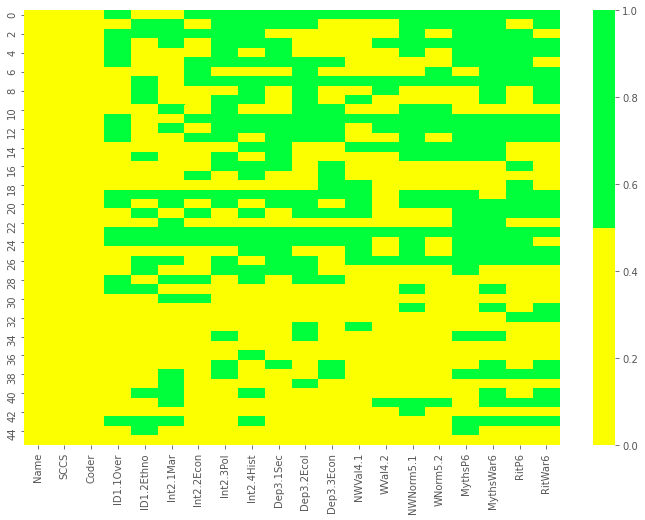

In [14]:
# get the first 20 columns
cols = df.columns[:20]
colors = ['#fbff00', '#00ff3b']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors)) 

### 1.2 Percentage List

Lets create list that tells us the percent of missing data for each particular feature.

In [15]:
# for large datasets, this could take a long time. 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
SCCS - 0%
Coder - 0%
ID1.1Over - 33%
ID1.2Ethno - 35%
Int2.1Mar - 39%
Int2.2Econ - 30%
Int2.3Pol - 50%
Int2.4Hist - 50%
Dep3.1Sec - 43%
Dep3.2Ecol - 48%
Dep3.3Econ - 37%
NWVal4.1 - 30%
WVal4.2 - 22%
NWNorm5.1 - 48%
WNorm5.2 - 33%
MythsP6 - 54%
MythsWar6 - 65%
RitP6 - 50%
RitWar6 - 52%
SymP6 - 72%
SymWar6 - 57%
SuperOrd7 - 48%
CM8.1Neg - 59%
CM8.2Med - 83%
CM8.3Arb - 85%
CM8.4Adj - 70%
CM8.5Peace - 78%
CM8.6War - 78%
Lead9.1P - 63%
Lead9.2War - 65%
Cult10.1Com - 57%
Cult10.2Diff - 63%
Comp10.3 - 70%
InComp10.4 - 76%
PSys - 0%
PSysRec - 0%


### 1.3 Bar Plot

Another way to visualize missing data is a histogram.
The histogram allows us to identify the missing values among all observations

In [22]:
miss = df[cols].isnull()

In [23]:
miss = np.sum(miss)
miss

Name           0
SCCS           0
Coder          0
ID1.1Over     15
ID1.2Ethno    16
Int2.1Mar     18
Int2.2Econ    14
Int2.3Pol     23
Int2.4Hist    23
Dep3.1Sec     20
Dep3.2Ecol    22
Dep3.3Econ    17
NWVal4.1      14
WVal4.2       10
NWNorm5.1     22
WNorm5.2      15
MythsP6       25
MythsWar6     30
RitP6         23
RitWar6       24
dtype: int64

<AxesSubplot:xlabel='index'>

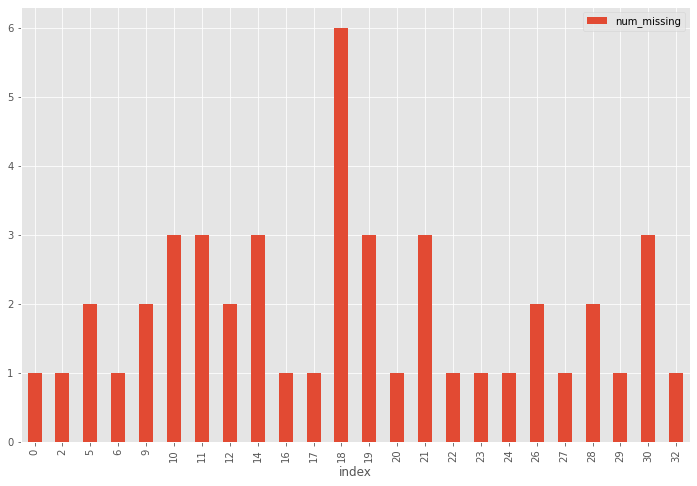

In [18]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [24]:
df.head()

,Name,SCCS,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,...,CM8.4Adj_ismissing,CM8.5Peace_ismissing,CM8.6War_ismissing,Lead9.1P_ismissing,Lead9.2War_ismissing,Cult10.1Com_ismissing,Cult10.2Diff_ismissing,Comp10.3_ismissing,InComp10.4_ismissing,num_missing
0,Gilbertese,107,KA,NaN,2.0,3.0,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,30
1,Marshallese,108,EC,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,True,True,False,True,False,True,True,True,True,21
2,E. Pomo,135,"KA, EC",NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,True,True,True,False,True,True,True,True,True,21
3,Popoluca,154,KA,NaN,3.0,NaN,3.0,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,27
4,Konso,35,KA,NaN,2.0,3.0,4.0,NaN,4.0,NaN,...,True,True,True,True,True,False,True,False,False,18


## 2.0 Dealing With Missing Data

Depending on the dataset that you're analyzing, you'll have to decide which technique works best for dealing with the dataset.

Though there is one size fits all answer, studying/analysing the data can provide nuances that can help you decide. 

### 2.1 Obsevation Dropping

If an observation contains missing values, dropping the entire observation is a simple option. 

If you are sure that the observation does not provide any unique insight, you can drop it.

We can set a threshold that drop observations that contain more than X number of missing values

In [286]:
# Lets find the number of missing values each observation has
idx_missing = df[df['num_missing'] > 10].index
df_less_missing_rows = df.drop(idx_missing, axis=0)

In [287]:
# We see that these are the indices of the observations that contain more than 
# 10 missing datapoints.
idx_missing

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 34, 37, 38, 40, 41,
            43, 44],
           dtype='int64')

In [288]:
#  these are some of the observations that contain 10 or less 
# missing datapoints
df_less_missing_rows.head()

,Name,SCCS,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,...,CM8.4Adj_ismissing,CM8.5Peace_ismissing,CM8.6War_ismissing,Lead9.1P_ismissing,Lead9.2War_ismissing,Cult10.1Com_ismissing,Cult10.2Diff_ismissing,Comp10.3_ismissing,InComp10.4_ismissing,num_missing
22,Shavante,179,KA,2.0,3.0,NaN,2.0,1.0,1.0,1.0,...,True,True,True,False,False,False,False,False,False,9
30,Switzerland,200,DM,3.0,3.0,NaN,NaN,2.0,4.0,4.0,...,False,False,False,False,True,False,False,True,True,5
31,Iroquois,201,KA,3.5,2.5,3.0,3.5,4.0,4.0,4.0,...,True,False,True,False,True,False,False,False,True,10
32,Orang Asli,202,DPF,3.0,3.0,2.0,2.0,1.0,3.0,1.0,...,False,True,True,True,False,False,False,False,False,10
33,Nilgiri Pla.,203,DPF,2.0,3.0,1.0,4.0,2.0,4.0,1.0,...,True,True,True,True,True,False,False,False,False,9


In [289]:
# these are some of the observations that contain 10 or more
# missing datapoints
df[df['num_missing'] > 10].head()

,Name,SCCS,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,...,CM8.4Adj_ismissing,CM8.5Peace_ismissing,CM8.6War_ismissing,Lead9.1P_ismissing,Lead9.2War_ismissing,Cult10.1Com_ismissing,Cult10.2Diff_ismissing,Comp10.3_ismissing,InComp10.4_ismissing,num_missing
0,Gilbertese,107,KA,NaN,2.0,3.0,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,30
1,Marshallese,108,EC,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,True,True,False,True,False,True,True,True,True,21
2,E. Pomo,135,"KA, EC",NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,True,True,True,False,True,True,True,True,True,21
3,Popoluca,154,KA,NaN,3.0,NaN,3.0,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,27
4,Konso,35,KA,NaN,2.0,3.0,4.0,NaN,4.0,NaN,...,True,True,True,True,True,False,True,False,False,18


### 2.2 Feature Dropping

Another alternative is dropping the entire feature.
If we see that a feature has a high percentage of missing data, we may want to drop the entire feature

In [290]:
# Let say that SCCS does not provide any insights to our dataset
# For that reason we want to drop it.
# Currently, the dataset contains SCCS
df.head()

,Name,SCCS,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,...,CM8.4Adj_ismissing,CM8.5Peace_ismissing,CM8.6War_ismissing,Lead9.1P_ismissing,Lead9.2War_ismissing,Cult10.1Com_ismissing,Cult10.2Diff_ismissing,Comp10.3_ismissing,InComp10.4_ismissing,num_missing
0,Gilbertese,107,KA,NaN,2.0,3.0,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,30
1,Marshallese,108,EC,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,True,True,False,True,False,True,True,True,True,21
2,E. Pomo,135,"KA, EC",NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,True,True,True,False,True,True,True,True,True,21
3,Popoluca,154,KA,NaN,3.0,NaN,3.0,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,27
4,Konso,35,KA,NaN,2.0,3.0,4.0,NaN,4.0,NaN,...,True,True,True,True,True,False,True,False,False,18


In [291]:
# These are the features that we want to drop. In this case only SCCS
cols_to_drop = ['SCCS']
# We use the drop function and specify the axis. (0 for row and 1 for columns)
df_less_sccs = df.drop(cols_to_drop, axis=1)

In [292]:
# We see that SCCS was succesfully dropped
df_less_sccs.head()

,Name,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,Dep3.2Ecol,...,CM8.4Adj_ismissing,CM8.5Peace_ismissing,CM8.6War_ismissing,Lead9.1P_ismissing,Lead9.2War_ismissing,Cult10.1Com_ismissing,Cult10.2Diff_ismissing,Comp10.3_ismissing,InComp10.4_ismissing,num_missing
0,Gilbertese,KA,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,30
1,Marshallese,EC,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,True,True,False,True,False,True,True,True,True,21
2,E. Pomo,"KA, EC",NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,True,True,True,False,True,True,True,True,True,21
3,Popoluca,KA,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0,...,True,True,True,True,True,True,True,True,True,27
4,Konso,KA,NaN,2.0,3.0,4.0,NaN,4.0,NaN,2.0,...,True,True,True,True,True,False,True,False,False,18


### 2.3 Impute Missing Data

When imputing missing data, we replace the missing values with the average or median value from 
the data of the same feature that is not missing. 

If the feature is categorical, we can consider imputing the missing data by the mode. 

In [293]:
med = df['Int2.1Mar'].median()
print("The median for Int2.1Mar is: {}".format(med))

The median for Int2.1Mar is: 2.0


In [294]:
# These are the first 10 current values of Int2.1Mar
df['Int2.1Mar'][:10]

0    3.0
1    NaN
2    NaN
3    NaN
4    3.0
5    2.0
6    4.0
7    1.0
8    4.0
9    1.0
Name: Int2.1Mar, dtype: float64

In [295]:
# Lets use fillna to replace all the Nan values within
# Int2.1Mar with its median. 
df['Int2.1Mar'] = df['Int2.1Mar'].fillna(med)

In [296]:
# As you can see, we no longer have Nan values
# within the Int2.1Mar column. They were all replaced with 2.0
df['Int2.1Mar'][:10]

0    3.0
1    2.0
2    2.0
3    2.0
4    3.0
5    2.0
6    4.0
7    1.0
8    4.0
9    1.0
Name: Int2.1Mar, dtype: float64

#### What if we only want to impute all numeric features? 

If a numeric feature contains missing values, then replace them
with their median. 

In [297]:
# Lets see how many missing values each column has.
for col in df.columns:
    print('{} contains {} missing values'.format(col, df[col].isnull().sum()))

Name contains 0 missing values
SCCS contains 0 missing values
Coder contains 0 missing values
ID1.1Over contains 15 missing values
ID1.2Ethno contains 16 missing values
Int2.1Mar contains 0 missing values
Int2.2Econ contains 14 missing values
Int2.3Pol contains 23 missing values
Int2.4Hist contains 23 missing values
Dep3.1Sec contains 20 missing values
Dep3.2Ecol contains 22 missing values
Dep3.3Econ contains 17 missing values
NWVal4.1 contains 14 missing values
WVal4.2 contains 10 missing values
NWNorm5.1 contains 22 missing values
WNorm5.2 contains 15 missing values
MythsP6 contains 25 missing values
MythsWar6 contains 30 missing values
RitP6 contains 23 missing values
RitWar6 contains 24 missing values
SymP6 contains 33 missing values
SymWar6 contains 26 missing values
SuperOrd7 contains 22 missing values
CM8.1Neg contains 27 missing values
CM8.2Med contains 38 missing values
CM8.3Arb contains 39 missing values
CM8.4Adj contains 32 missing values
CM8.5Peace contains 36 missing value

In [298]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing) # sum up all missing observations
    # do imputations if the feature contains missing values
    if num_missing > 0:
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

In [299]:
# We see that there is no more missing values
for col in df.columns:
    print('{} contains {} missing values'.format(col, df[col].isnull().sum()))

Name contains 0 missing values
SCCS contains 0 missing values
Coder contains 0 missing values
ID1.1Over contains 0 missing values
ID1.2Ethno contains 0 missing values
Int2.1Mar contains 0 missing values
Int2.2Econ contains 0 missing values
Int2.3Pol contains 0 missing values
Int2.4Hist contains 0 missing values
Dep3.1Sec contains 0 missing values
Dep3.2Ecol contains 0 missing values
Dep3.3Econ contains 0 missing values
NWVal4.1 contains 0 missing values
WVal4.2 contains 0 missing values
NWNorm5.1 contains 0 missing values
WNorm5.2 contains 0 missing values
MythsP6 contains 0 missing values
MythsWar6 contains 0 missing values
RitP6 contains 0 missing values
RitWar6 contains 0 missing values
SymP6 contains 0 missing values
SymWar6 contains 0 missing values
SuperOrd7 contains 0 missing values
CM8.1Neg contains 0 missing values
CM8.2Med contains 0 missing values
CM8.3Arb contains 0 missing values
CM8.4Adj contains 0 missing values
CM8.5Peace contains 0 missing values
CM8.6War contains 0 mi

#### What if we only want to impute all categorical features?

In [300]:
# Lets get a dataframe that only contains non numeric features
df_non_numeric = df[['Name', 'Coder']]
non_numeric_cols = df_non_numeric.columns.values

In [301]:
# Some of them are true/false columns and Name and Coder are features
# containing strings
non_numeric_cols

array(['Name', 'Coder'], dtype=object)

In [302]:
# We see that our categorical features do not contain
# Nan values
for col in non_numeric_cols:
    print('{} contains {} missing values'.format(col, df_non_numeric[col].isnull().sum()))

Name contains 0 missing values
Coder contains 0 missing values


In [303]:
# create new dataframe
df_coder_nulls = df
# Lets introduce Nan values are random for the Coder feature
df_coder_nulls['Coder'] = df['Coder'].sample(frac=0.5) 
print('Coder contains {} missing values'.format(df_coder_nulls['Coder'].isnull().sum()))

Coder contains 23 missing values


In [304]:
# Lets get some information about the categorical feature "Coder"
df_coder_nulls['Coder'].describe()

count     23
unique     6
top       KA
freq       9
Name: Coder, dtype: object

In [305]:
# This shows the number of observations that have the value KA in the 
# feature Coder
len(np.array(df_coder_nulls[df_coder_nulls['Coder'] == 'KA'].Coder))

9

In [306]:
# Lets replace the Nan in the categorical features with
# the most appearing value

# The top used value is KA for the categorical featured 'Coder'
df_coder_nulls['Coder'].describe()['top']

'KA'

In [307]:
# Lets create an extra column that records the number of missing values
# in each categorical feature

# iterate through all non numeric features
for col in non_numeric_cols:
    # get the missing values of the current feature
    missing = df_coder_nulls[col].isnull()
    # get the number of missing values
    num_missing = np.sum(missing)
    
    # if the count is greater than 0
    if num_missing > 0:
        # create an extra column with the name of the feature
        # and append '_ismissing' and asign the number of missing values from 
        # it's feature. 
        df_coder_nulls['{}_ismissing'.format(col)] = missing
        # replace the missing value with the most used value
        top = df_coder_nulls[col].describe()['top']
        # replace Nan with top
        df_coder_nulls[col] = df_coder_nulls[col].fillna(top)

In [308]:
# KA is still top but now its frequency has increaced since
# we replaced all of Coder null values with KA
df_coder_nulls['Coder'].describe()

count     46
unique     6
top       KA
freq      32
Name: Coder, dtype: object

### 2.4 Replace
We can also replace missing valuse with place holders or other numbers

In [309]:
# get a new dataframe with the data
df_replace = pd.read_csv(PATH + DATA_LOCATION).replace(9, np.nan)

In [310]:
df_replace['ID1.2Ethno'][:5]

0    2.0
1    NaN
2    NaN
3    3.0
4    2.0
Name: ID1.2Ethno, dtype: float64

In [311]:
df_replace['Int2.1Mar'][:5]

0    3.0
1    NaN
2    NaN
3    NaN
4    3.0
Name: Int2.1Mar, dtype: float64

In [312]:
# categorical
df_replace['ID1.2Ethno'] = df_replace['ID1.2Ethno'].fillna('MISSING')

# numeric
df_replace['Int2.1Mar'] = df_replace['Int2.1Mar'].fillna(-1)

In [313]:
# We replaced all Nan with MISSING
df_replace['ID1.2Ethno'][:5]

0          2
1    MISSING
2    MISSING
3          3
4          2
Name: ID1.2Ethno, dtype: object

In [314]:
# We replace all Nan with -1
df_replace['Int2.1Mar'][:5]

0    3.0
1   -1.0
2   -1.0
3   -1.0
4    3.0
Name: Int2.1Mar, dtype: float64

## 3.0 Outliers

Outliers are extreme values that deviate from other observations. 

How can we find outliers in our dataset?

### 3.1 Histogram/Box Plot

For numeric features we can use a histogram.

<AxesSubplot:>

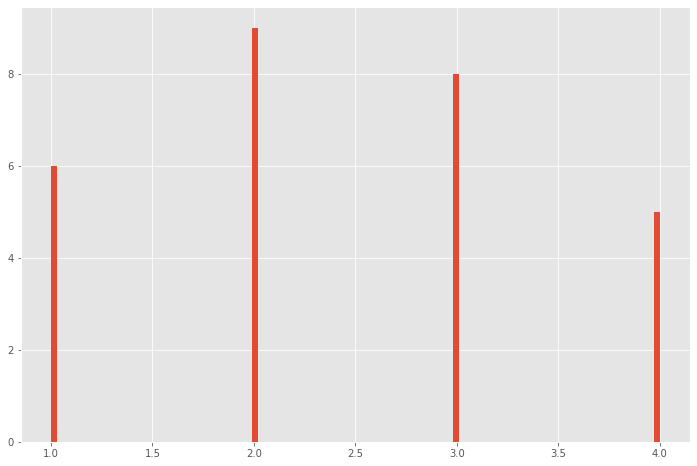

In [26]:
df['Int2.1Mar'].hist(bins=100)

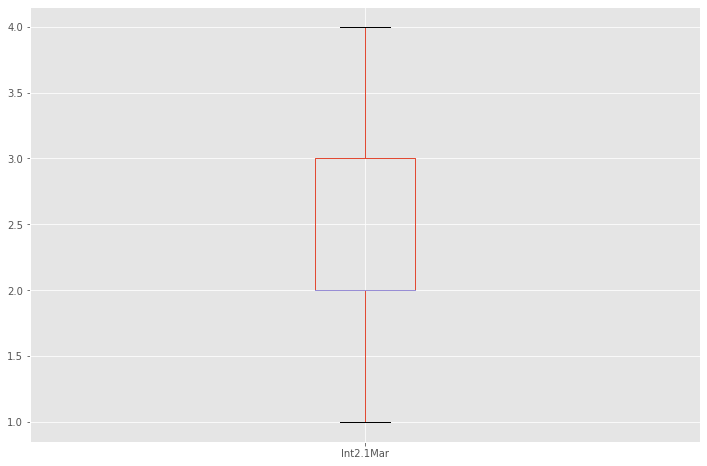

In [316]:
df.boxplot(column=['Int2.1Mar'])

### 3.2 Descriptive Statistics

In [317]:
df['Int2.1Mar'].describe()

count    46.000000
mean      2.260870
std       0.828245
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Int2.1Mar, dtype: float64

## 4.0 Unnecessary Data

Lets look at ways to remove overredundant data. 

Which data provides no value when we feed it to the model? 

### 4.1 Uninformative/Repetative

We can create a list that shows the percentages of the same values. 
Lets find the features that have 75% of the same value.

In [318]:
# get the number of observations (rows)
num_rows = len(df.index)
# features that contain low information
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts / num_rows).iloc[0]
    
    if top_pct > 0.75:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

NWNorm5.1: 76.08696%
4.0    35
2.0     5
1.0     3
3.0     3
Name: NWNorm5.1, dtype: int64

MythsWar6: 76.08696%
2.0    35
1.0     4
3.0     4
4.0     2
1.5     1
Name: MythsWar6, dtype: int64

SymP6: 76.08696%
3.0    35
2.0     6
4.0     5
Name: SymP6, dtype: int64

CM8.2Med: 89.13043%
3.0    41
2.0     3
4.0     2
Name: CM8.2Med, dtype: int64

CM8.3Arb: 89.13043%
2.0    41
1.0     3
4.0     2
Name: CM8.3Arb, dtype: int64

CM8.4Adj: 76.08696%
2.0    35
1.0     6
4.0     4
2.5     1
Name: CM8.4Adj, dtype: int64

CM8.5Peace: 91.30435%
4.0    42
2.0     3
1.0     1
Name: CM8.5Peace, dtype: int64

CM8.6War: 89.13043%
1.0    41
2.0     3
4.0     1
0.0     1
Name: CM8.6War, dtype: int64

Cult10.2Diff: 91.30435%
1.0    42
2.0     2
4.0     1
3.0     1
Name: Cult10.2Diff, dtype: int64

Comp10.3: 80.43478%
3.0    37
4.0     4
1.0     3
2.0     2
Name: Comp10.3, dtype: int64

InComp10.4: 89.13043%
1.0    41
2.0     2
3.0     2
4.0     1
Name: InComp10.4, dtype: int64

WVal4.2_ismissing: 78.2608

### 4.2 Irrelevance

How can do we find features that do not contain relevant observations. 
If the feature does not provide any relevance or insights to the dataset, you can simply drop that
particular feature. To see how to drop features look at section [2.2 Feature Dropping](#2.2-Feature-Dropping)

### 4.3 Duplicates

In [319]:
# create a dataframe with duplicate columns
df_duplicates = df.sum(axis=1, level=0, skipna=False)

In [320]:
df_duplicates = df_duplicates.drop('SCCS', axis=1).drop_duplicates()

In [321]:
# contains 71 columns
df.shape

(46, 71)

In [322]:
# removed duplicate column
df_duplicates.shape

(46, 70)